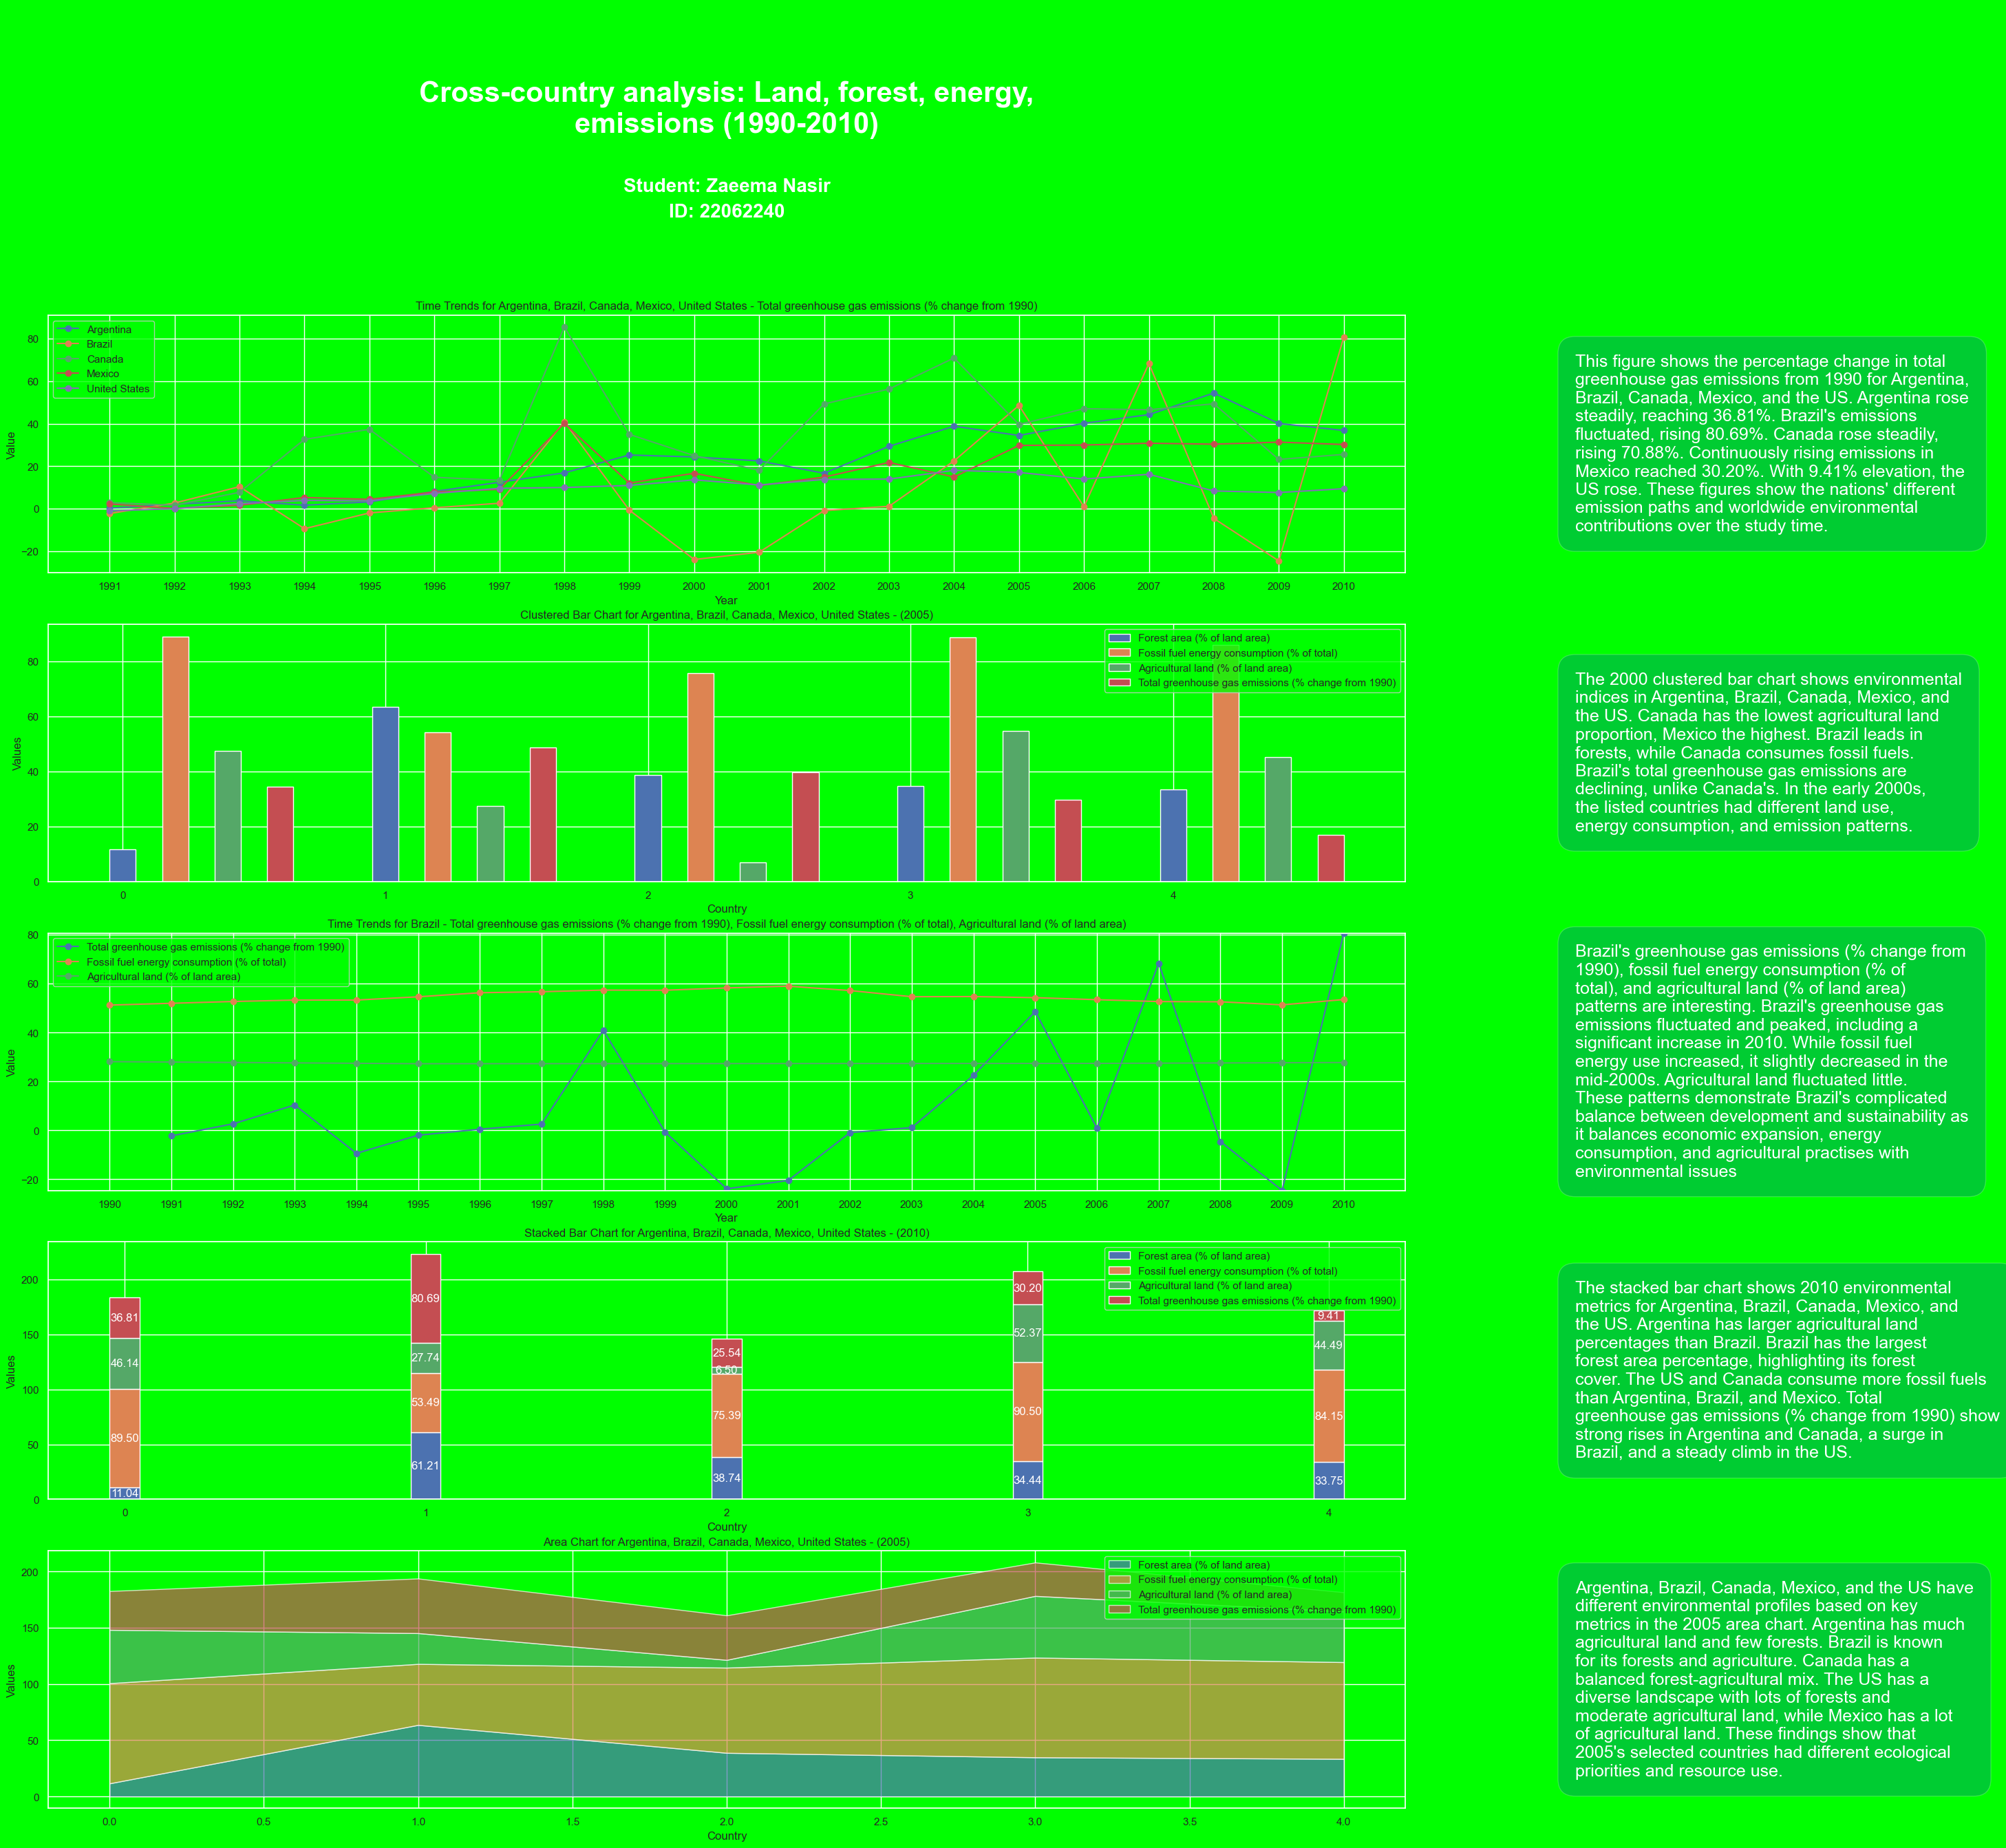

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import matplotlib.font_manager

# Load the dataset
file_path = r'./Dataset(2).csv'
data = pd.read_csv(file_path)

# Set the dark background style
sns.set(rc={'axes.facecolor': 'lime', 'figure.facecolor': 'lime'})

# Create subplots
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(35, 34), gridspec_kw={'width_ratios': [0.8, 0.2]})

title_text = 'Cross-country analysis: Land, forest, energy, emissions (1990-2010)'
student_name = 'Student: Zaeema Nasir'
student_id = 'ID: 22062240'

axs[0, 0].wrapped_text = textwrap.fill(title_text, width=50)
axs[0, 0].text(0.5, 0.6, axs[0, 0].wrapped_text, ha='center', va='center', weight='bold', color='white', fontsize=30, transform=axs[0, 0].transAxes)

axs[0, 0].text(0.5, 0.3, student_name, ha='center', va='center', weight='bold', color='white', fontsize=20, transform=axs[0, 0].transAxes)
axs[0, 0].text(0.5, 0.2, student_id, ha='center', va='center', weight='bold', color='white', fontsize=20, transform=axs[0, 0].transAxes)
axs[0, 0].axis('off')  # Turn off axis for the first cell

axs[0, 1].axis('off')  # Turn off axis

# Graphs

# Plot 1
indicator_to_analyze_first_plot = 'Total greenhouse gas emissions (% change from 1990)'
selected_countries = ['Argentina', 'Brazil', 'Canada', 'Mexico', 'United States']

selected_data_first_plot = data[(data['Indicator Name'] == indicator_to_analyze_first_plot) & (data['Country Name'].isin(selected_countries))]

for country in selected_countries:
    country_data = selected_data_first_plot[selected_data_first_plot['Country Name'] == country]
    axs[1, 0].plot(country_data.columns[2:], country_data.iloc[0, 2:], marker='o', label=country)

axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Value')
axs[1, 0].set_title(f'Time Trends for {", ".join(selected_countries)} - {indicator_to_analyze_first_plot}')
axs[1, 0].legend()

# Plot 2
indicators_to_analyze_second_plot = ['Forest area (% of land area)', 'Fossil fuel energy consumption (% of total)', 'Agricultural land (% of land area)', 'Total greenhouse gas emissions (% change from 1990)']
selected_countries = ['Argentina', 'Brazil', 'Canada', 'Mexico', 'United States']
selected_year_second_plot = '2005'

selected_data_second_plot = data[(data['Indicator Name'].isin(indicators_to_analyze_second_plot)) & (data['Country Name'].isin(selected_countries))]

bar_positions = np.arange(len(selected_countries))
bar_width = 0.1
bar_gap = 0.1

for i, indicator in enumerate(indicators_to_analyze_second_plot):
    values = selected_data_second_plot[(selected_data_second_plot['Indicator Name'] == indicator)][selected_year_second_plot].astype(float).values
    axs[2, 0].bar(bar_positions + i * (bar_width + bar_gap), values, width=bar_width, label=indicator)

axs[2, 0].set_xlabel('Country')
axs[2, 0].set_ylabel('Values')
axs[2, 0].set_title(f'Clustered Bar Chart for {", ".join(selected_countries)} - ({selected_year_second_plot})')
axs[2, 0].legend()

# Plot 3
indicators_to_analyze_third_plot = ['Total greenhouse gas emissions (% change from 1990)', 'Fossil fuel energy consumption (% of total)', 'Agricultural land (% of land area)']
selected_country = 'Brazil'

selected_data_third_plot = data[(data['Indicator Name'].isin(indicators_to_analyze_third_plot)) & (data['Country Name'] == selected_country)]

for indicator in indicators_to_analyze_third_plot:
    indicator_data = selected_data_third_plot[selected_data_third_plot['Indicator Name'] == indicator]
    axs[3, 0].plot(indicator_data.columns[2:], indicator_data.iloc[0, 2:], marker='o', label=indicator)

axs[3, 0].set_ylim(bottom=selected_data_third_plot.iloc[:, 2:].min().min(), top=selected_data_third_plot.iloc[:, 2:].max().max())
axs[3, 0].set_xlabel('Year')
axs[3, 0].set_ylabel('Value')
axs[3, 0].set_title(f'Time Trends for {selected_country} - {", ".join(indicators_to_analyze_third_plot)}')
axs[3, 0].legend()

# Plot 4
indicators_to_analyze_fourth_plot = ['Forest area (% of land area)', 'Fossil fuel energy consumption (% of total)', 'Agricultural land (% of land area)', 'Total greenhouse gas emissions (% change from 1990)']
selected_countries = ['Argentina', 'Brazil', 'Canada', 'Mexico', 'United States']
selected_year_fourth_plot = '2010'

selected_data_fourth_plot = data[(data['Indicator Name'].isin(indicators_to_analyze_fourth_plot)) & (data['Country Name'].isin(selected_countries))]

bottom_values = np.zeros(len(selected_countries))

for i, indicator in enumerate(indicators_to_analyze_fourth_plot):
    values = selected_data_fourth_plot[(selected_data_fourth_plot['Indicator Name'] == indicator)][selected_year_fourth_plot].astype(float).values
    axs[4, 0].bar(bar_positions, values, width=bar_width, bottom=bottom_values, label=indicator)

    for j, value in enumerate(values):
         axs[4, 0].text(bar_positions[j] , bottom_values[j] + value / 2, f'{value:.2f}', ha='center', va='center', color='white')

    bottom_values += values

axs[4, 0].set_xlabel('Country')
axs[4, 0].set_ylabel('Values')
axs[4, 0].set_title(f'Stacked Bar Chart for {", ".join(selected_countries)} - ({selected_year_fourth_plot})')
axs[4, 0].legend()

# Plot 5

indicators_to_analyze_area_chart = ['Forest area (% of land area)', 'Fossil fuel energy consumption (% of total)', 'Agricultural land (% of land area)', 'Total greenhouse gas emissions (% change from 1990)']
selected_countries_area_chart = ['Argentina', 'Brazil', 'Canada', 'Mexico', 'United States']
selected_year_area_chart = '2005'

selected_data_area_chart = data[(data['Indicator Name'].isin(indicators_to_analyze_area_chart)) & (data['Country Name'].isin(selected_countries_area_chart))]

stacks_area_chart = []

for i, indicator in enumerate(indicators_to_analyze_area_chart):
    values = selected_data_area_chart[(selected_data_area_chart['Indicator Name'] == indicator)][selected_year_area_chart].astype(float).values

    if i == 0:
        axs[5, 0].fill_between(np.arange(len(selected_countries_area_chart)), 0, values, label=indicator, alpha=0.7)
    else:
        axs[5, 0].fill_between(np.arange(len(selected_countries_area_chart)), stacks_area_chart[-1], stacks_area_chart[-1] + values, label=indicator, alpha=0.7)

    stacks_area_chart.append(stacks_area_chart[-1] + values if i > 0 else values)

axs[5, 0].set_xlabel('Country')
axs[5, 0].set_ylabel('Values')
axs[5, 0].set_title(f'Area Chart for {", ".join(selected_countries_area_chart)} - ({selected_year_area_chart})')
axs[5, 0].legend()

# Explanations

# Explanation for Plot 1
axs[1, 1].axis('off')  # Turn off axis for the second column

long_text_1 = 'This figure shows the percentage change in total greenhouse gas emissions from 1990 for Argentina, Brazil, Canada, Mexico, and the US. Argentina rose steadily, reaching 36.81%. Brazil\'s emissions fluctuated, rising 80.69%. Canada rose steadily, rising 70.88%. Continuously rising emissions in Mexico reached 30.20%. With 9.41% elevation, the US rose. These figures show the nations\' different emission paths and worldwide environmental contributions over the study time.'

axs[1, 1].wrapped_text = textwrap.fill(long_text_1, width=50)
axs[1, 1].text(0, 0.5, axs[1, 1].wrapped_text, ha='left', va='center', color='white', fontsize=18, transform=axs[1, 1].transAxes, bbox=dict(
        boxstyle='round', facecolor='blue', alpha=0.2, pad =1))

# Explanation for Plot 2
axs[2, 1].axis('off')  # Turn off axis for the second column

long_text_2 = 'The 2000 clustered bar chart shows environmental indices in Argentina, Brazil, Canada, Mexico, and the US. Canada has the lowest agricultural land proportion, Mexico the highest. Brazil leads in forests, while Canada consumes fossil fuels. Brazil\'s total greenhouse gas emissions are declining, unlike Canada\'s. In the early 2000s, the listed countries had different land use, energy consumption, and emission patterns.'

axs[2, 1].wrapped_text = textwrap.fill(long_text_2, width=50)
axs[2, 1].text(0, 0.5, axs[2, 1].wrapped_text, ha='left', va='center', color='white', fontsize=18, transform=axs[2, 1].transAxes, bbox=dict(
        boxstyle='round', facecolor='blue', alpha=0.2, pad=1))

# Explanation for Plot 3
axs[3, 1].axis('off')  # Turn off axis for the second column

long_text_3 = 'Brazil\'s greenhouse gas emissions (% change from 1990), fossil fuel energy consumption (% of total), and agricultural land (% of land area) patterns are interesting. Brazil\'s greenhouse gas emissions fluctuated and peaked, including a significant increase in 2010. While fossil fuel energy use increased, it slightly decreased in the mid-2000s. Agricultural land fluctuated little. These patterns demonstrate Brazil\'s complicated balance between development and sustainability as it balances economic expansion, energy consumption, and agricultural practises with environmental issues'

axs[3, 1].wrapped_text = textwrap.fill(long_text_3, width=50)
axs[3, 1].text(0, 0.5, axs[3, 1].wrapped_text, ha='left', va='center', color='white', fontsize=18, transform=axs[3, 1].transAxes, bbox=dict(
        boxstyle='round', facecolor='blue', alpha=0.2, pad =1))

# Explanation for Plot 4
axs[4, 1].axis('off')  # Turn off axis for the second column

long_text_4 = 'The stacked bar chart shows 2010 environmental metrics for Argentina, Brazil, Canada, Mexico, and the US. Argentina has larger agricultural land percentages than Brazil. Brazil has the largest forest area percentage, highlighting its forest cover. The US and Canada consume more fossil fuels than Argentina, Brazil, and Mexico. Total greenhouse gas emissions (% change from 1990) show strong rises in Argentina and Canada, a surge in Brazil, and a steady climb in the US.'

axs[4, 1].wrapped_text = textwrap.fill(long_text_4, width=50)
axs[4, 1].text(0, 0.5, axs[4, 1].wrapped_text, ha='left', va='center', color='white', fontsize=18, transform=axs[4, 1].transAxes, bbox=dict(
        boxstyle='round', facecolor='blue', alpha=0.2, pad = 1))

# Explanation for Plot 5
axs[5, 1].axis('off')  # Turn off axis for the second column

long_text_5 = 'Argentina, Brazil, Canada, Mexico, and the US have different environmental profiles based on key metrics in the 2005 area chart. Argentina has much agricultural land and few forests. Brazil is known for its forests and agriculture. Canada has a balanced forest-agricultural mix. The US has a diverse landscape with lots of forests and moderate agricultural land, while Mexico has a lot of agricultural land. These findings show that 2005\'s selected countries had different ecological priorities and resource use.'

axs[5, 1].wrapped_text = textwrap.fill(long_text_5, width=50)
axs[5, 1].text(0, 0.5, axs[5, 1].wrapped_text, ha='left', va='center', color='white', fontsize=18, transform=axs[5, 1].transAxes, bbox=dict(
        boxstyle='round', facecolor='blue', alpha=0.2, pad = 1))

# Save the figure as a PNG file
#plt.savefig("22062240.png", dpi=300)
plt.show()
